<a href="https://colab.research.google.com/github/vir097/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING--Viral-Shewale/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_viral_shewale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Problem Statement </b>

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## <b>Attribute Information </b>

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **1. Load Dataset** 

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Netflix_df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING --- Viral Shewale/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

## **2. Basic Inspection of dataset**

In [4]:
# Head of the dataset 
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Tail of the dataset
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# Get the differnt columns present in the dataset
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Shape of the dataset
Netflix_df.shape

(7787, 12)

* **There are $12$ different attributes (coloumns) and $7787$ rows.**

In [8]:
# data type of the object
Netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
# Checking the unique values in each attribute of the dataset
Netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## **3. Data Cleaning** 

In [10]:
# Creating copy of the original dataset
df = Netflix_df.copy()

In [11]:
# Checking for duplicate records
df.duplicated().value_counts()

False    7787
dtype: int64

* **There is no duplicated values present in the dataset.**

**Checking null values:**

In [12]:
# checking for missing value in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* **There are five different columns in the dataset which contain null values.**

      director        2389
      cast             718
      country          507
      date_added        10
      rating             7

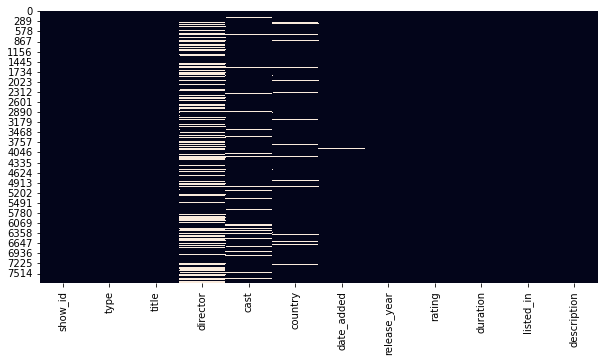

In [13]:
# Visualizing the missing values
# Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

**Handling Null values:**

* **The missing values in the director, cast, and country attributes can be replaced with 'Unknown'.**
* **10 records with missing values in the date_added column can be dropped.**
* **The missing values in rating can be imputed with its mode, since this attribute is discrete.**

In [14]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# shape of the dataset after cleaning
df.shape

(7777, 12)

**Top Countries:**

In [17]:
# top countries where most movies and tv shows were filmed
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

* **There are some movies / TV shows that were filmed in multiple countries. To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.**

In [18]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])

In [19]:
# contry in which a movie/TV shows was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

* **There are 82 different countries where different movies and TV shows were filmed.**

**Genre of movies and TV shows:**

In [20]:
# Genre of movies and TV shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

* **There are some movies / TV shows that have multiple genres associated with it. To simplify the analysis, let's consider only the primary genre of the respective movie / TV show.**

In [21]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [22]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [23]:
# unique number of geners
len(df.listed_in.value_counts())

36

**Converted the datatype of duration column to int:**

In [24]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
# datatype of duration
df.duration.dtype

dtype('int64')

* **We have successfully converted the datatype of duration column to int.**

In [26]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [27]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

**Convert from string to datetime:**

In [28]:
# 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [29]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

**Extract month and year from date_added column:**

In [30]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# drop date_added column from dataset df
df.drop('date_added', axis=1, inplace=True)

## **4. Exploratary Data Analysis**

**4.1. Number of Movies and TV Shows on Netflix:**

In [31]:
# Number of Movies and TV Shows in the dataset
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

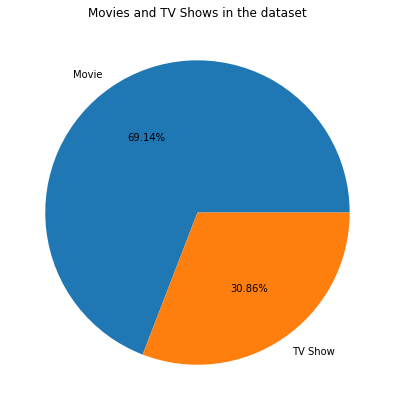

In [32]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

* **As we can see that there are more Movies ($69.14$%) than TV Show ($30.86$%).**

**4.2. Unique genre of the listed movies and shows:**

In [33]:
# Get the unique genre of the listed movies and shows
print(df['listed_in'].value_counts())
print('Total different number of genres:',len(df['listed_in'].unique()))

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

* **There are a total of 36 different genres of movies on Netflix.**

In [34]:
# To 10 genres on Netflix
genre = pd.DataFrame(df['listed_in'].value_counts().sort_values(ascending=False).head(10)).reset_index()
genre.rename(columns={"index":"Genre",'listed_in':'total_count'},inplace=True)
genre

,Genre,total_count
0,Dramas,1384
1,Comedies,1074
2,Documentaries,751
3,Action & Adventure,721
4,International TV Shows,689
5,Children & Family Movies,502
6,Crime TV Shows,369
7,Kids' TV,357
8,Stand-Up Comedy,321
9,Horror Movies,244


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

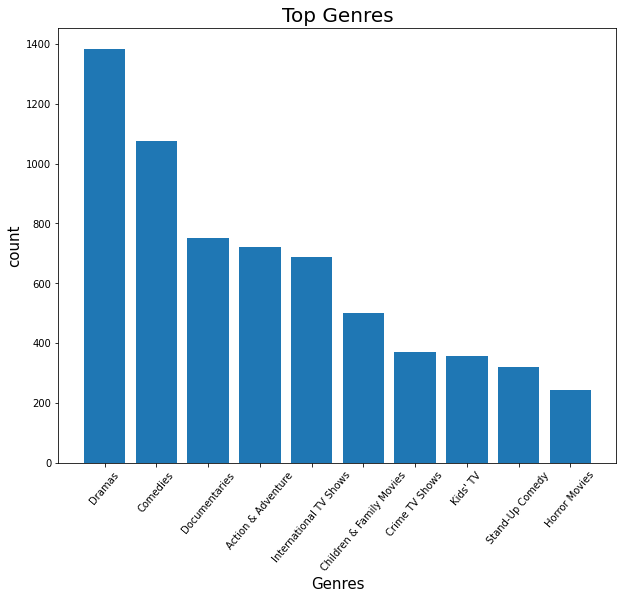

In [35]:
# visualization of top 10 genres
plt.figure(figsize=(10,8))
plt.bar(genre['Genre'], genre["total_count"])
plt.xlabel('Genres',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Top Genres',fontsize=20)
plt.xticks(rotation=50)


In [36]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

* **As we can see, Dramas are Netflix's most popular genre folled by comedies and Documentaries**
* **These three genres account for about $41$% of all movies and TV shows.**


Text(0.5, 1.0, 'Top 10 genres for movies')

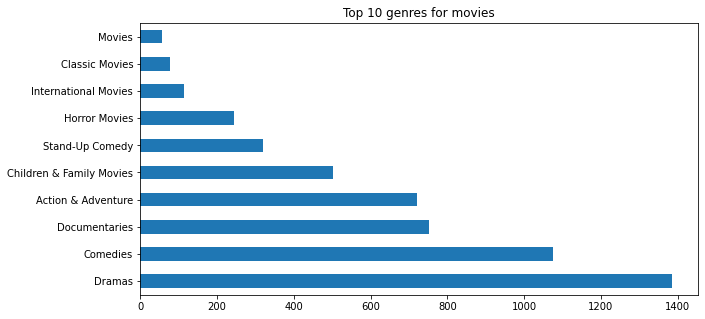

In [37]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

* **Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.**

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

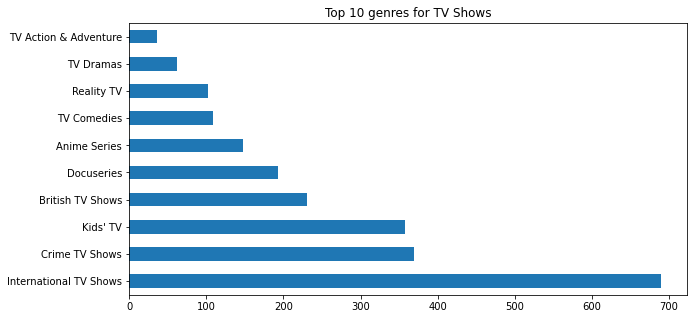

In [38]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

* **International, crime, and kids are the most popular genre for TV shows on Netflix.**

**4.3. Top Movies and TV shows Directors:**

In [39]:
# Top 10 directors
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: director, dtype: int64

Text(0.5, 1.0, 'Top 10 movie directors')

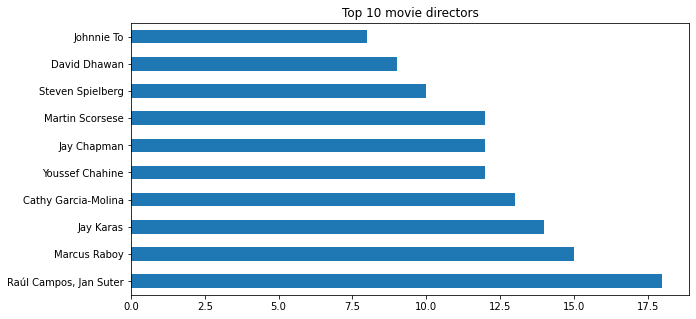

In [40]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

* **Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.**
* **This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina.**

Text(0.5, 1.0, 'Top 10 TV show directors')

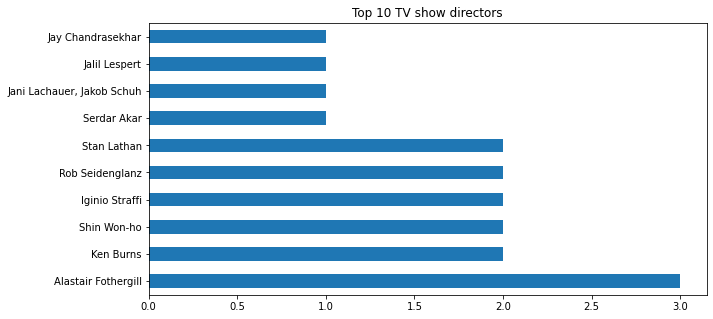

In [41]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

* **Alastair Fothergill has directed three TV shows, the most of any director.**
* **Only six directors have directed more than one television show.**

**4.4. Top countries with highest number of movies/TV shows.**

In [42]:
# Top 10 countries with the highest number of movies/TV shows
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10)

United States     2877
India              956
United Kingdom     576
Canada             259
Japan              236
France             196
South Korea        194
Spain              168
Mexico             123
Australia          107
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies/TV shows')

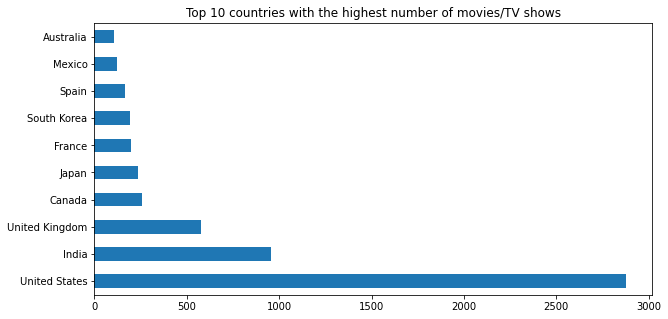

In [43]:
# Top 10 countries with the highest number of movies/TV shows
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of movies/TV shows')

In [44]:
df[~(df['country']=='Unknown')].country.value_counts().nlargest(3)/len(df)*100

United States     36.993699
India             12.292658
United Kingdom     7.406455
Name: country, dtype: float64

* **The highest number of movies / TV shows were from US, followed by India and UK.**
* **The top 3 countries together account for about 56% of all movies and TV shows in the dataset.**


**4.5. Number of shows added on different months:**

Text(0.5, 0, 'Months')

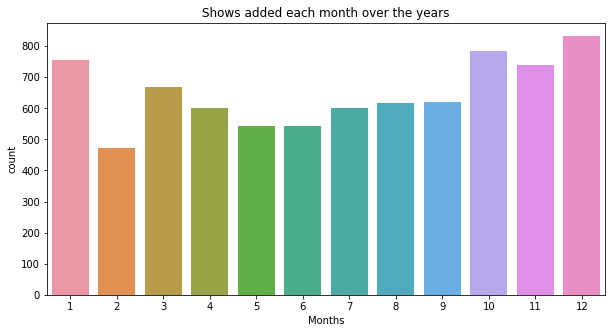

In [45]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(x=df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('Months')

* **More movies/TV shows were added to Netflix in January, October and December.**

**4.6. Number of shows added over the year:**

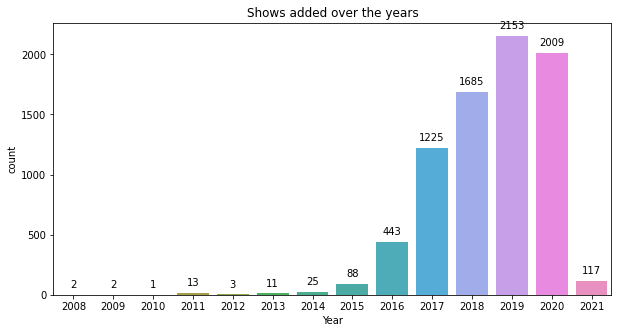

In [46]:
# number of shows added over the year
plt.figure(figsize = (10,5)) 
p=sns.countplot(x=df['year_added'])
plt.title('Shows added over the years')
plt.xlabel('Year')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* **Netflix has continued to add more shows to its platform over the years.**
* **The year 2020 saw a drop in the number of shows added, which can be attributed to the Covid-19-induced lockdown, which halted the production of the shows.**
* **We have Netflix data only up to 16th January 2021.**


Text(0.5, 1.0, 'distribution by released year')

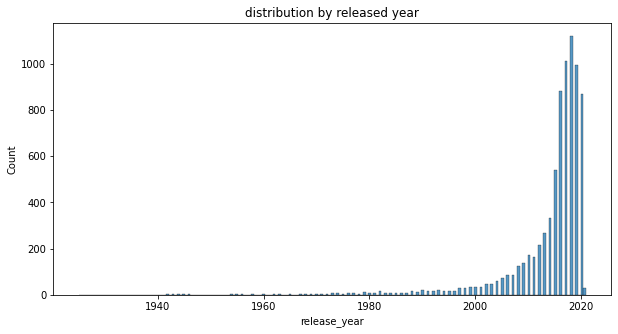

In [47]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

* **As we see, there were more new movies/TV shows on Netflix than the old ones.**

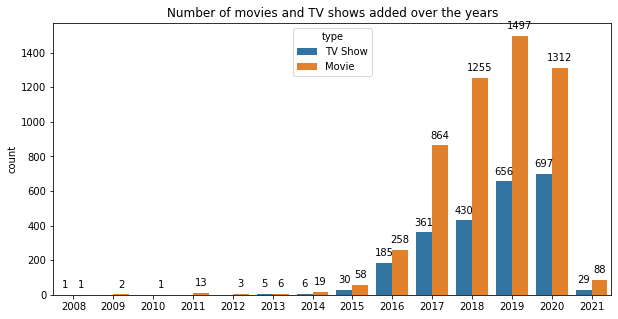

In [48]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


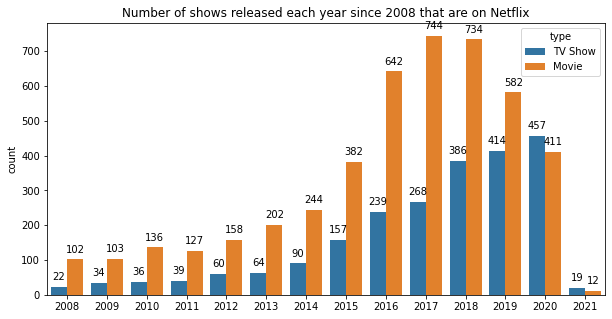

In [49]:
# Number of shows added each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


* **Over the years, Netflix has consistently focused on adding more shows to its platform.**
* **Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.**
* **This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.**

**4.6. Length/Seasons of Shows on Netflix:**

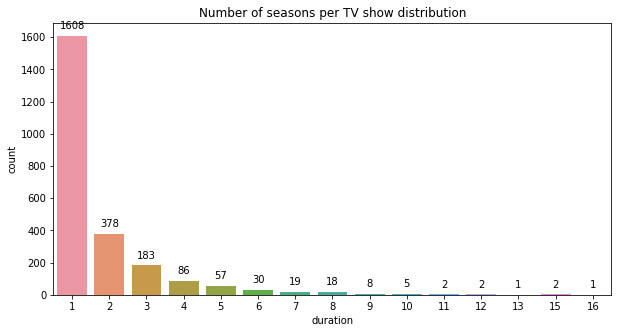

In [50]:
# Number of seasons per TV show distribution
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* **The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

Text(0.5, 1.0, 'Movie duration distribution')

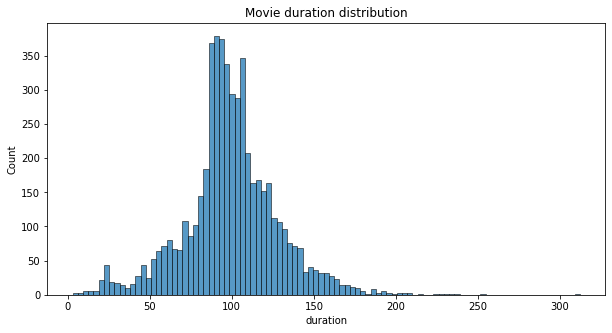

In [51]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [52]:
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* **Movie length range from 3 to 312.**

**4.7. Top movie/TV show cast:**

In [53]:
# Top 10 movie cast
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10)

Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Craig Sechler                                                                                                              6
Kevin Hart                                                                                                                 6
Iliza Shlesinger                                                                                                           5
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     5
Bill Burr                                                                                                                  5
Jim Gaffigan                                                                                                               5


Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

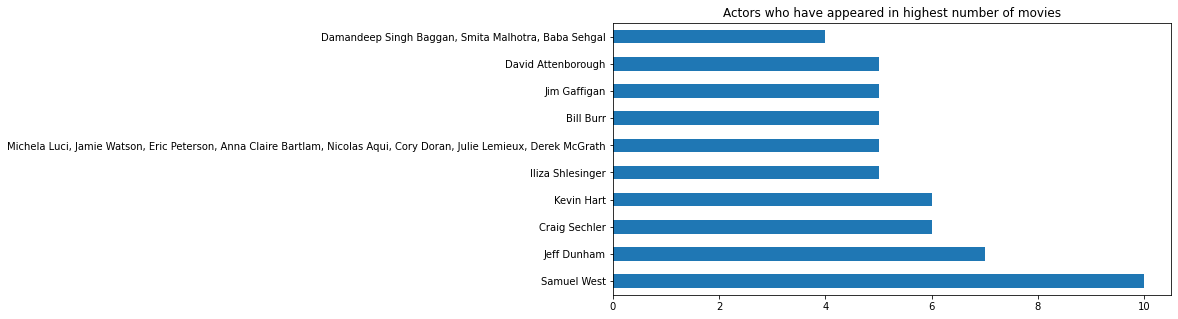

In [54]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* **Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.**

In [55]:
# Top 10 TV show cast
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10)

David Attenborough                                                                             13
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson                       4
R. Kelly                                                                                        2
Brennan Mejia, Camille Hyde, Yoshi Sudarso, Michael Taber, James Davies, Claire Blackwelder     2
Robert Clotworthy                                                                               2
Erik Thompson                                                                                   2
Mattea Conforti, Kobi Frumer                                                                    2
Bob Brisbane                                                                                    2
Anitta                                                                                          2
Dave Chappelle                                                                                  2
Name: cast, dtype: i

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

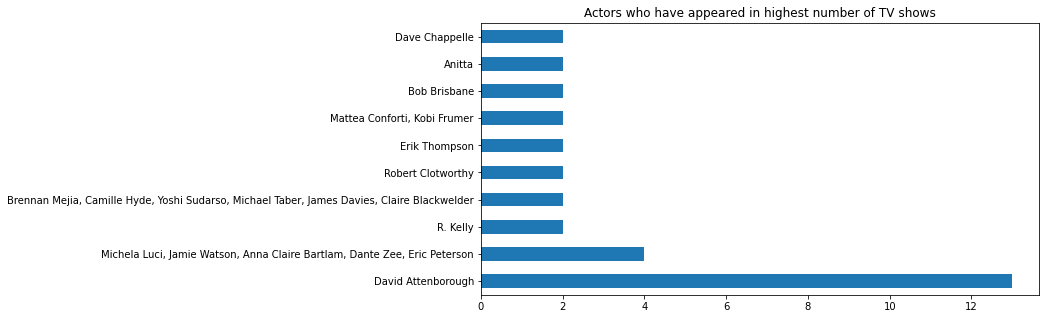

In [56]:
# Top 10 TV show cast
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')


* **David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.**

**4.8. Rating:**

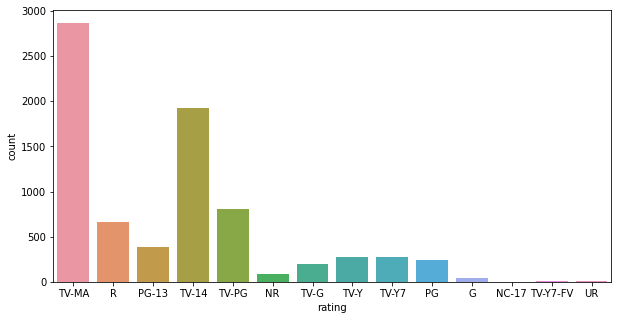

In [57]:
# Rating 
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating")

In [58]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

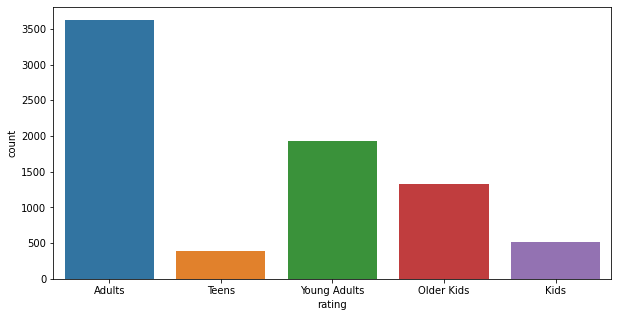

In [59]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

* **Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.**